<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/regresion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de liberias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
!pip install klib
!pip install --upgrade klib
import klib as klib
import seaborn as sns
from sklearn.metrics import r2_score

# montaje dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Introducción al Machine Learning/modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Cleaning

In [ ]:
df1= df.dropna()

In [ ]:
df1.info()
df1 = df1.loc[:, ['RM', 'LSTAT','PTRATIO', 'price']]
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  price    505 non-null    float64
dtypes: float64(14)
memory usage: 59.2 KB


,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [ ]:
filtro1 = df1["price"] > 0 
df1 = df1[filtro1]

# Analisis estadistico exploratorio

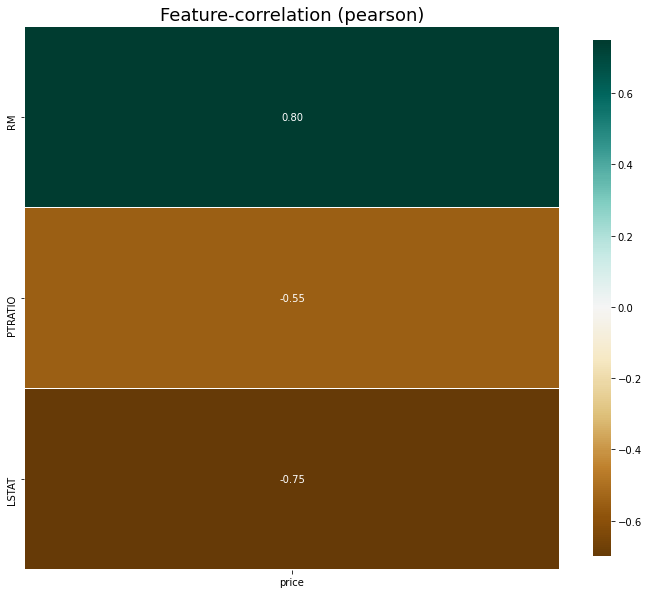

In [ ]:
klib.corr_plot(df1, target='price')

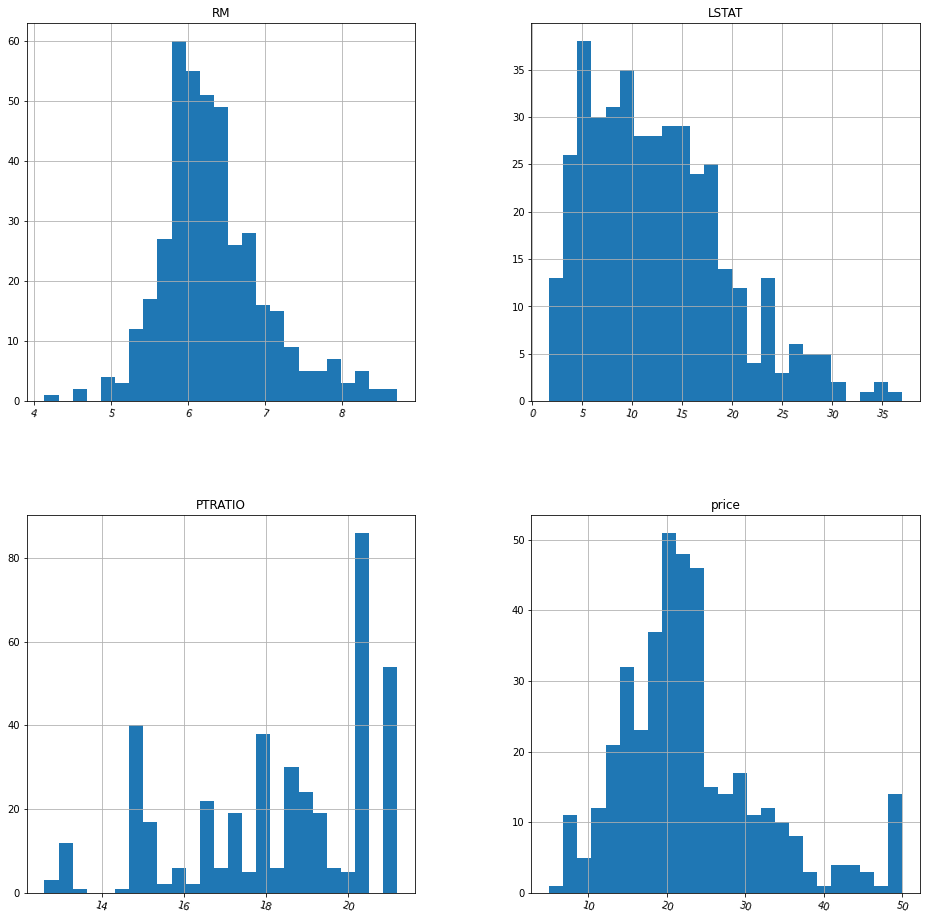

In [ ]:
df1.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

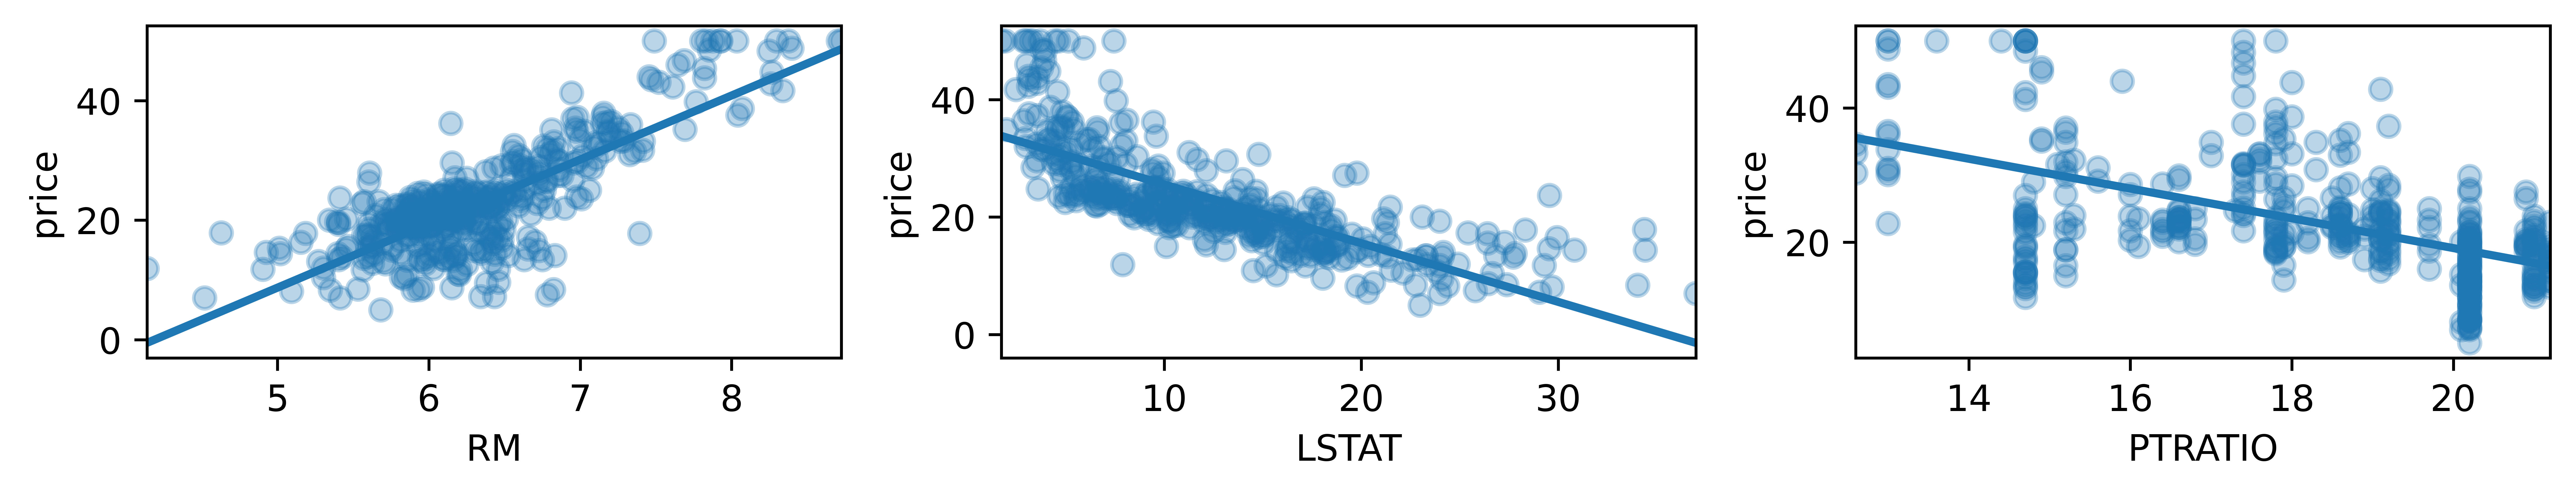

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=1000)
sns.regplot(x='RM', y='price', data=df1, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df1, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df1, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

# Determinacion de las features

In [ ]:
X = df1.loc[:,["RM","LSTAT","PTRATIO"]].values # colocar los Features del target ( variables explicativas)

X.shape # nos aseguramos que sea de solo 2 dimensiones para ser utilizado en nuestro algoritmo


(404, 3)

# Determinacion del target

In [ ]:
Y = df1["price"].values
Y.shape

(404,)

# Generacion del modelo de regresion

In [ ]:
# Esto ya se importó antes, así que coméntalo
# pero debes saber que necesitas importar un módulo 
# de sklearn.linear_model import LinearRegression


# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

# entrega de las variables al modelo

In [ ]:
reg.fit(X,Y) #El modelo aprende la relacion entre los features y el target


LinearRegression()

# Sección nueva

In [79]:
print(X[0].reshape(-1,3))

[[ 6.575  4.98  15.3  ]]


In [81]:
reg.predict(X[0].reshape(-1,3)) # La entrada debe ser bidimensional (la remodelación hace que la entrada sea bidimensional)

array([30.93692265])

In [ ]:
prediccion_x = reg.predict(X)
#prediccion_y = reg.predict(Y [0].reshape(1,-1))

# Metricas de regresion lineal

## R cuadrado

In [ ]:
# R cuadrado

reg.score(X,Y) # Metodo usando la info del modelo

r2_score(Y,prediccion_x) $ metodo con sklearn

0.7848414273030438

# Sección nueva

In [87]:
#MAE

np.sum(np.abs(Y - prediccion_x))/len(prediccion_x) # A MANO


from  sklearn.metrics import  mean_absolute_error

mean_absolute_error(Y,prediccion_x)



3.2313558816689714